In [1]:
from experiment import PavlovTiming
from model import ValueRNN
from train import make_dataloader, train_model, probe_model
from plotting import plot_trials, plot_loss, plot_predictions, plot_hidden_activity

### Create Experiment

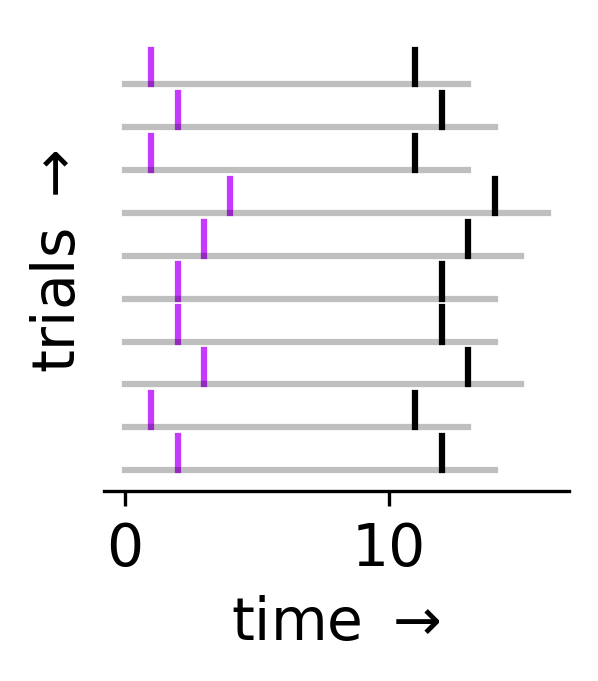

In [2]:
E = PavlovTiming(ncues=1)
plot_trials(E.trials[:10])

### Create Model

In [3]:
hidden_size = 2 # number of hidden neurons
gamma = 0.5     # discount rate
model = ValueRNN(input_size=E.ncues + int(E.include_reward),
                 output_size=7,
                 hidden_size=hidden_size, 
                 gamma=gamma)
print('model # parameters: {}'.format(model.n_parameters()))

model # parameters: 48


### Training Model

Epoch 0, 2.4839
Epoch 200, 1.8107
Epoch 400, 1.8071
Epoch 600, 1.8097
Epoch 800, 1.8062
Epoch 1000, 1.8056
Epoch 1200, 1.8050
Epoch 1400, 1.8037
Epoch 1600, 1.7989
Epoch 1800, 1.7959
Epoch 2000, 1.7934
Epoch 2200, 1.7917
Epoch 2400, 1.7894
Epoch 2600, 1.7870
Epoch 2800, 1.7849
Epoch 3000, 1.7834
Epoch 3200, 1.7818
Epoch 3400, 1.7808
Epoch 3600, 1.7801
Epoch 3800, 1.7800
Epoch 4000, 1.7794
Epoch 4200, 1.7792
Epoch 4400, 1.7791
Epoch 4600, 1.7790
Epoch 4800, 1.7789
Epoch 5000, 1.8255
Epoch 5200, 1.8259
Epoch 5400, 1.8122
Epoch 5600, 1.7975
Epoch 5800, 1.7894
Epoch 6000, 1.7881
Epoch 6200, 1.7877
Epoch 6400, 1.7875
Epoch 6600, 1.7872
Epoch 6800, 1.8015
Done! Best loss: 1.7788893580436707


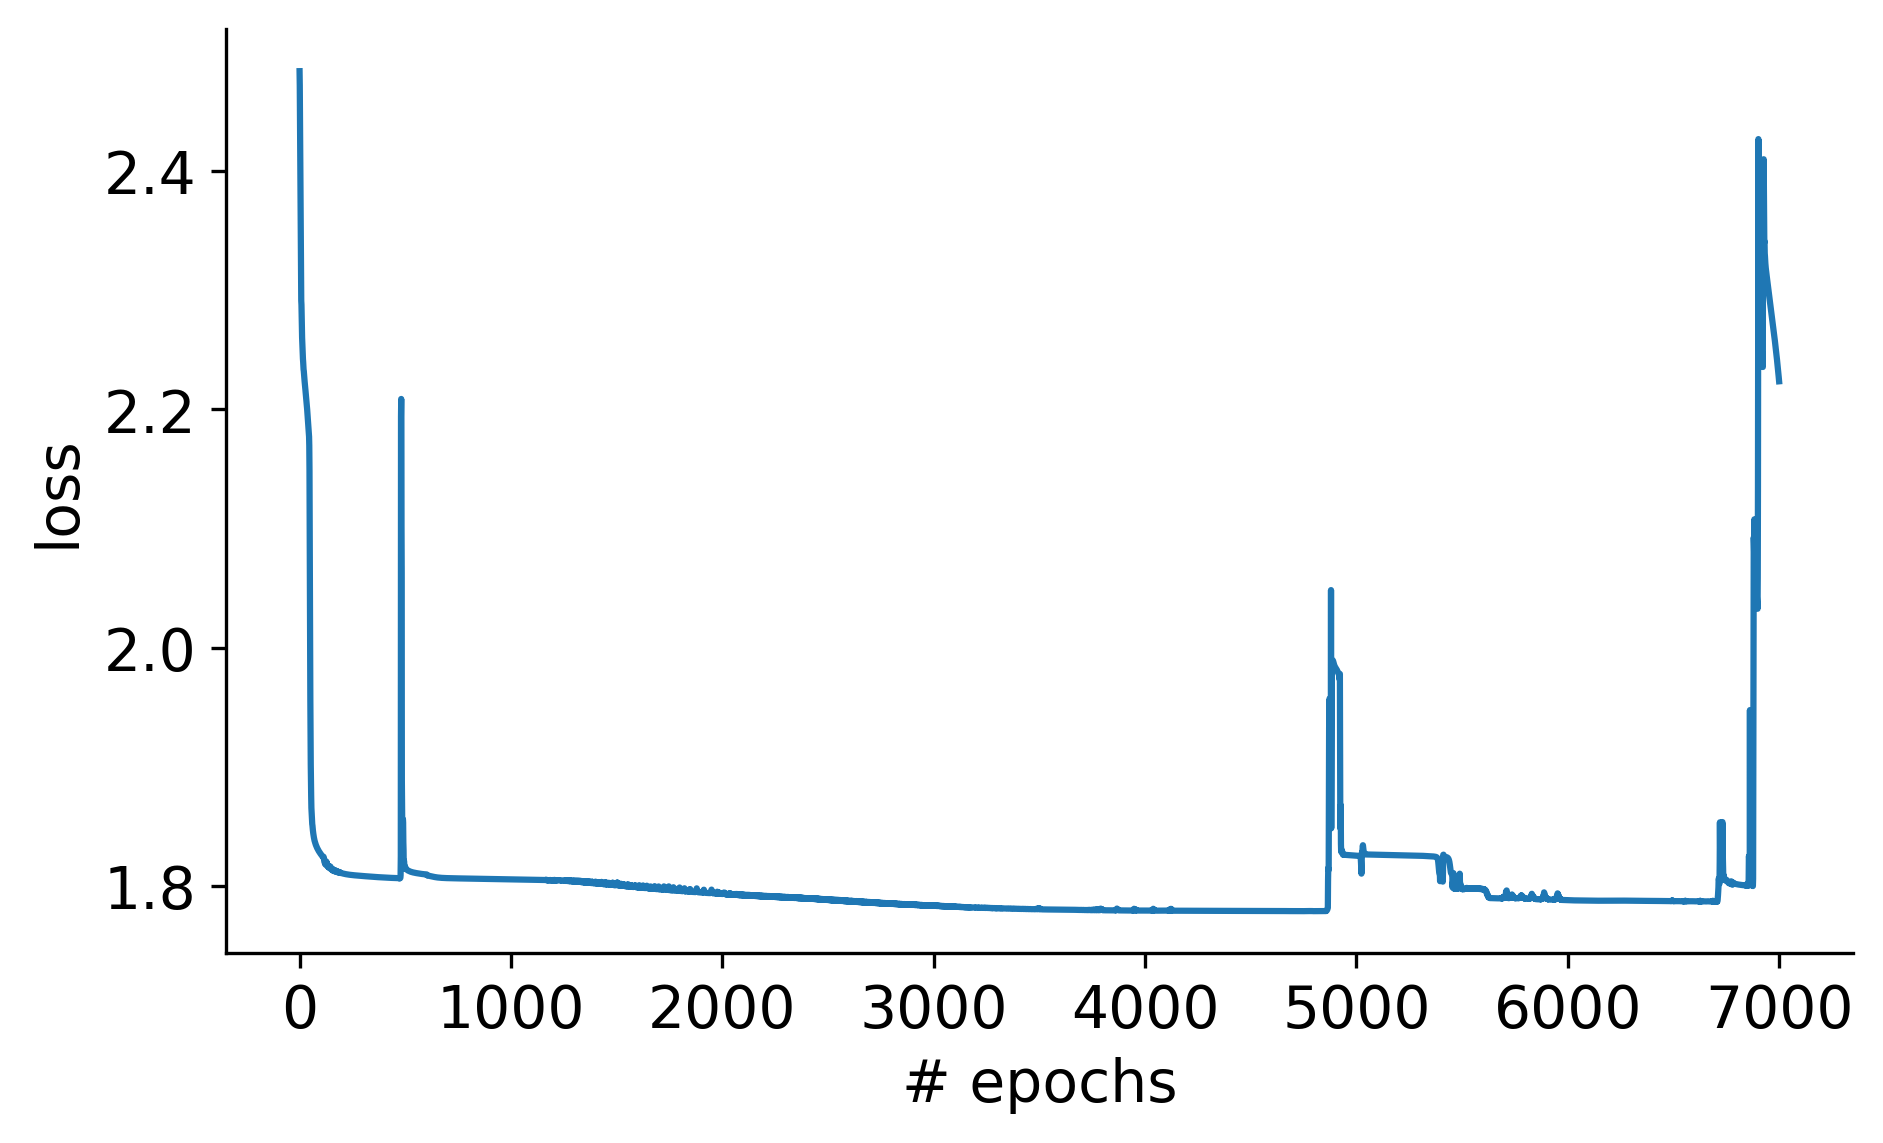

In [4]:
lr = 0.01
batch_size = 12
dataloader = make_dataloader(E, batch_size=batch_size)
scores = train_model(model, dataloader, lr=lr, epochs=7000, print_every=200)
plot_loss(scores)

### Plotting predicted and actual values

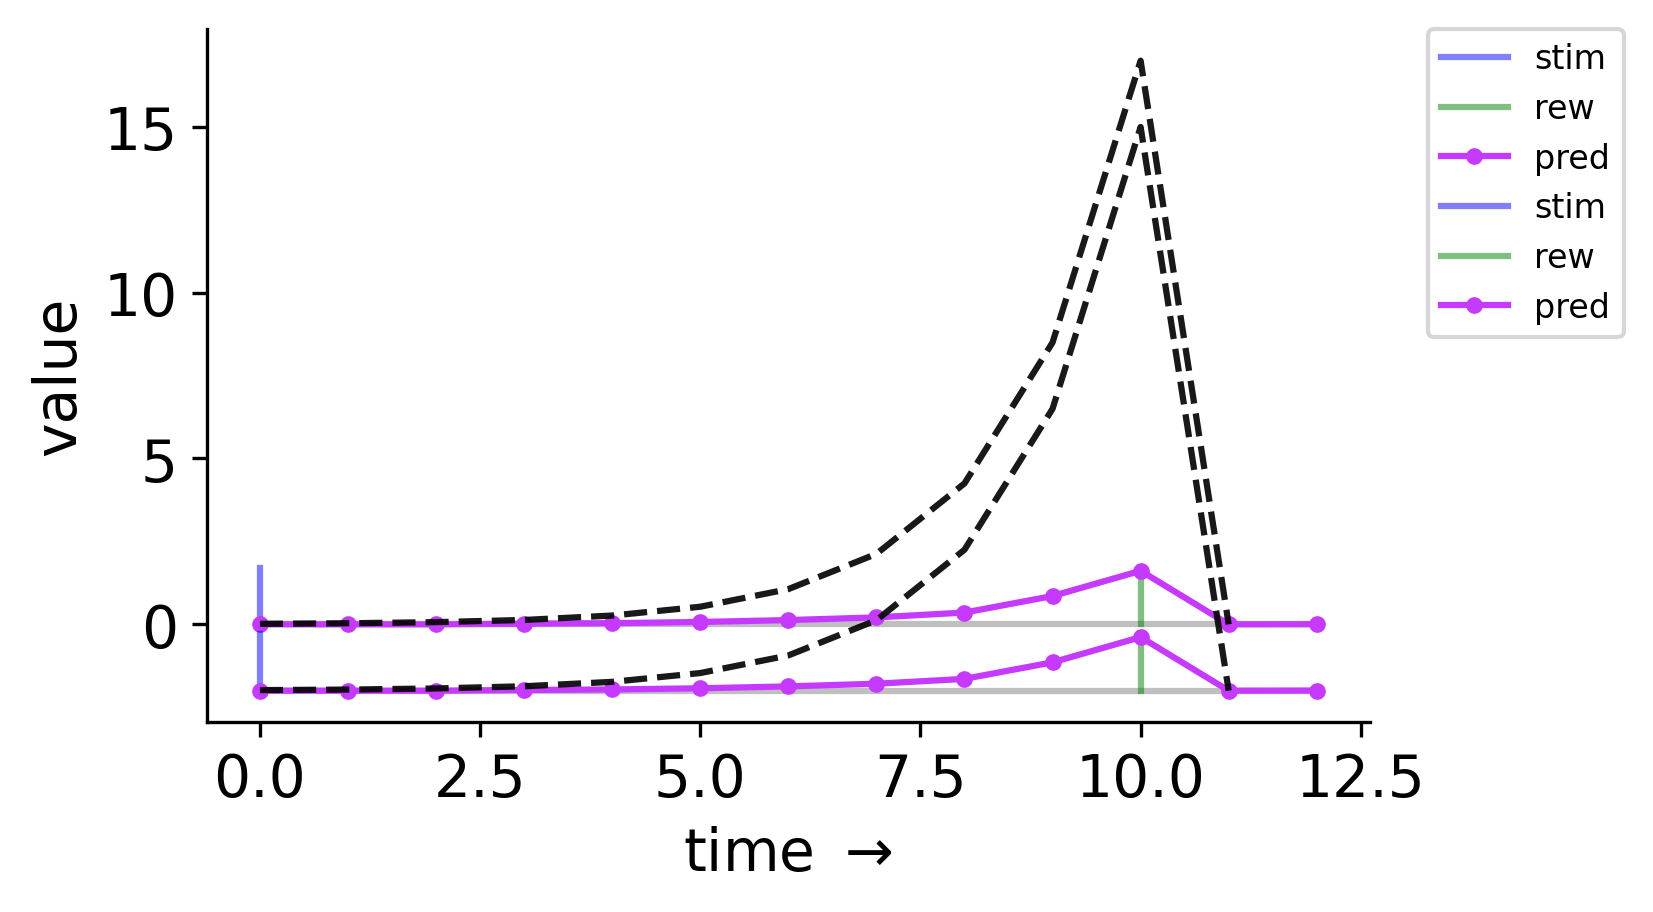

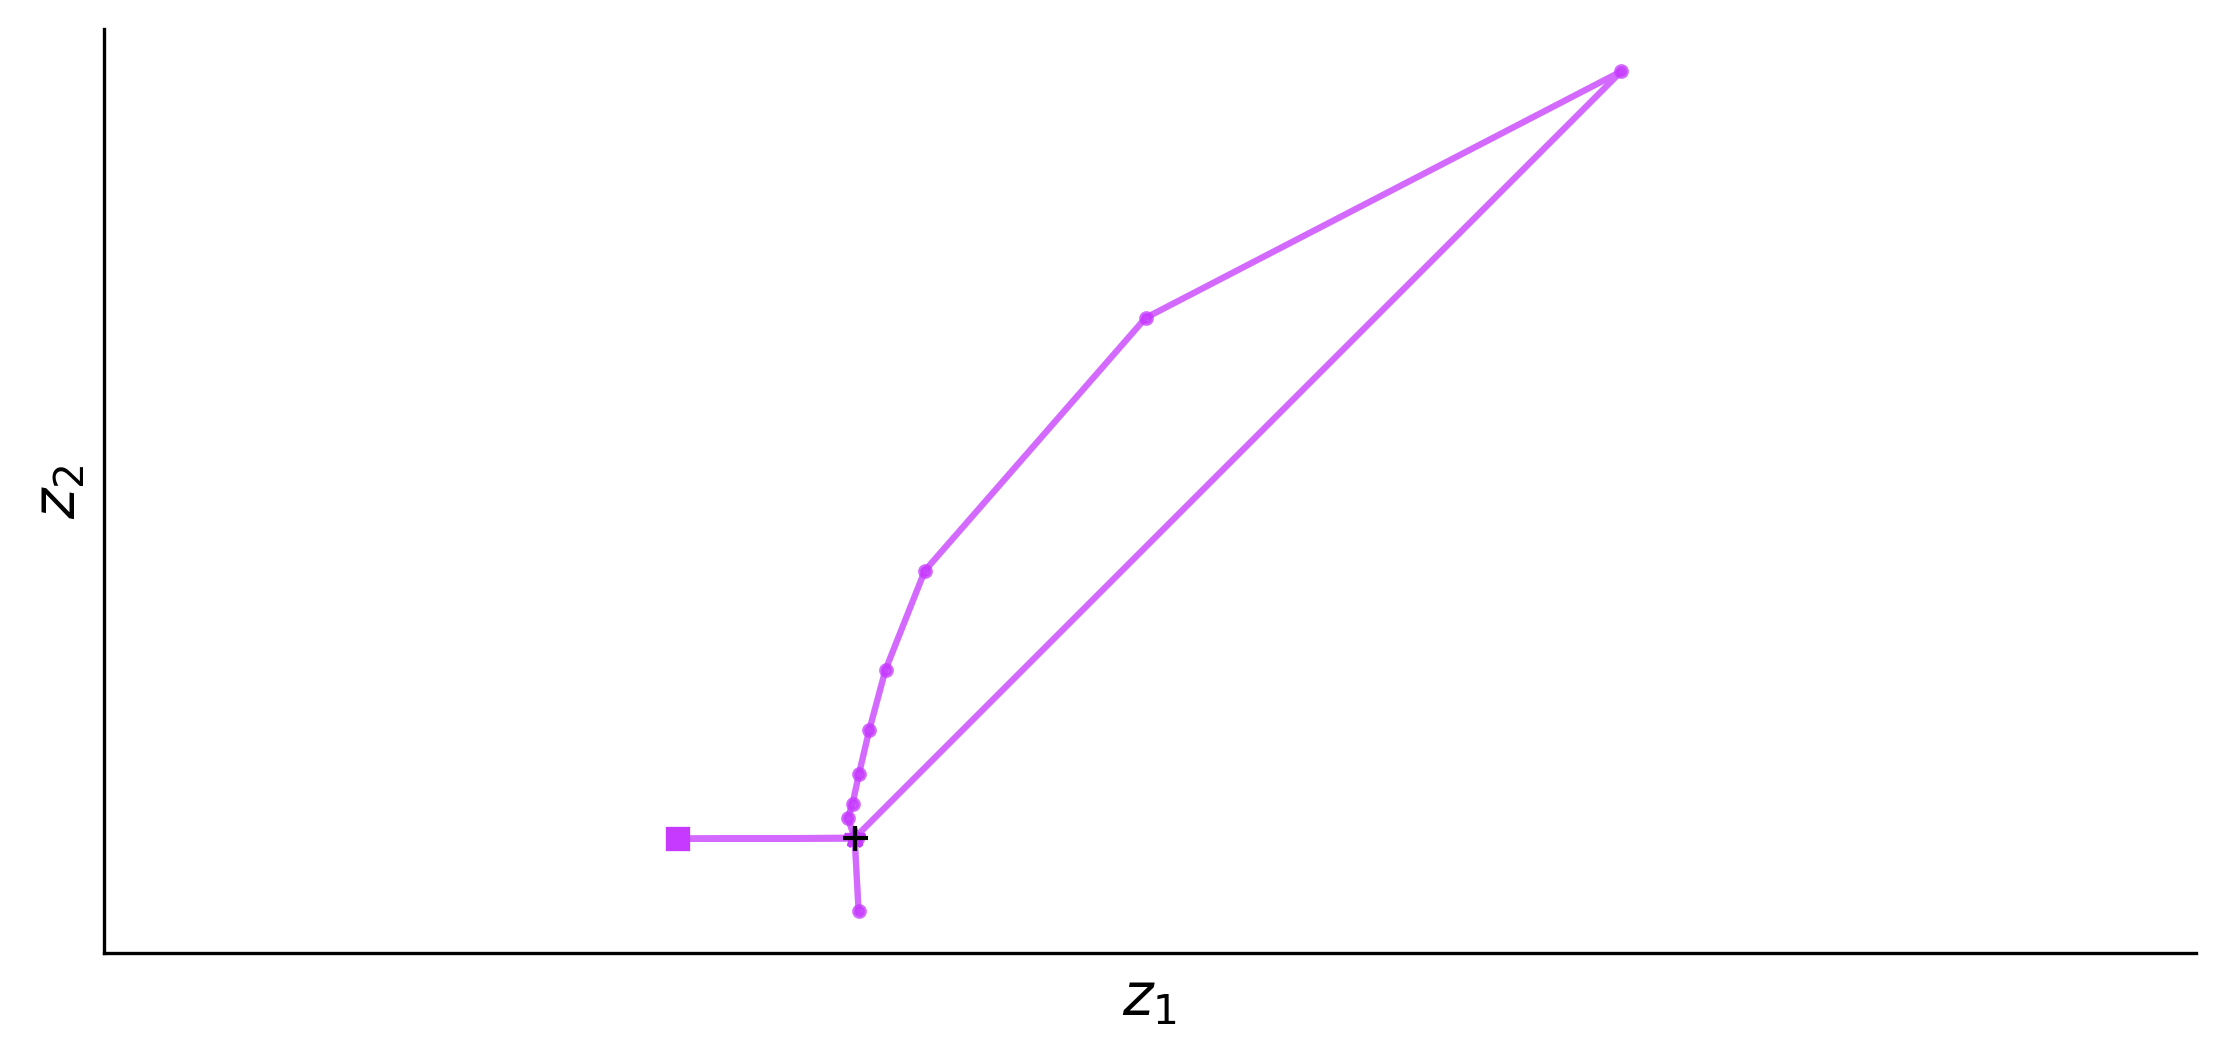

In [5]:
responses = probe_model(model, dataloader)
plot_predictions(responses[:2], 'value', gamma=model.gamma)
plot_hidden_activity(responses[:2])